작업형2 공개문제
-----------------------

 아래는 백화점 고객의 1년 간 구매 데이터이다.
 
 
 ____________________
 제공 데이터 목록
 y_train : 고객의 성별 데이터 (학습)
 X_train, X_test : 고객의 상품구매 속성
 

 데이터 형식 및 내용
 y_train(3,500x2) cust_id, gender
 
 X_train(3,500)
 X_test(2,482)
 
 ____________________
 고객 3,500명에 대한 학습용 데이터를 이용하여 성별예측 모형을 만든 후, 이를 평가용 데이터에 적용하여 얻은 2,482명 고객의 성별 예측값(남자일 확률)을 다음과 같은 형식의 CSV 파일로 생성하시오.
 
 
 

## 모듈 불러오기

In [1]:
import pandas as pd
import numpy as np

## 데이터 불러오기

In [19]:
X_train = pd.read_csv('data/X_train.csv',engine = 'python',index_col=0) #col 이름이 한국어 => 깨짐 방지를 위해 engine = 'python'
X_test = pd.read_csv('data/X_test.csv',engine = 'python',index_col=0) #col 이름이 한국어 => 깨짐 방지를 위해 engine = 'python'
y_train = pd.read_csv('data/y_train.csv',engine = 'python',index_col=0) #col 이름이 한국어 => 깨짐 방지를 위해 engine = 'python'

In [20]:
X_train

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,,,
0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17
1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1
2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1
3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16
4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85
...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0
3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40
3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0


In [21]:
X_test

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,내점일수,내점당구매건수,주말방문비율,구매주기
cust_id,,,,,,,,,
3500,70900400,22000000,4050000.0,골프,부산본점,13,1.461538,0.789474,26
3501,310533100,38558000,48034700.0,농산물,잠실점,90,2.433333,0.369863,3
3502,305264140,14825000,30521000.0,가공식품,본 점,101,14.623762,0.083277,3
3503,7594080,5225000,NaN,주방용품,부산본점,5,2.000000,0.000000,47
3504,1795790,1411200,NaN,수산품,청량리점,3,2.666667,0.125000,8
...,...,...,...,...,...,...,...,...,...
5977,82581500,23976000,NaN,골프,부산본점,8,1.750000,0.642857,40
5978,480000,480000,NaN,섬유잡화,광주점,1,1.000000,0.000000,0
5979,260003790,25750000,NaN,남성 캐주얼,본 점,19,3.736842,0.915493,18


In [22]:
y_train

,gender
cust_id,
0,0
1,0
2,1
3,1
4,0
...,...
3495,1
3496,1
3497,0


## 데이터 분포, 이상치, 결측치 확인

In [23]:
X_train.describe()

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기
count,3.500000e+03,3.500000e+03,1.205000e+03,3500.000000,3500.000000,3500.000000,3500.000000
mean,9.191925e+07,1.966424e+07,2.407822e+07,19.253714,2.834963,0.307246,20.958286
std,1.635065e+08,3.199235e+07,4.746453e+07,27.174942,1.912368,0.289752,24.748682
min,-5.242152e+07,-2.992000e+06,5.600000e+03,1.000000,1.000000,0.000000,0.000000
25%,4.747050e+06,2.875000e+06,2.259000e+06,2.000000,1.666667,0.027291,4.000000
50%,2.822270e+07,9.837000e+06,7.392000e+06,8.000000,2.333333,0.256410,13.000000
75%,1.065079e+08,2.296250e+07,2.412000e+07,25.000000,3.375000,0.448980,28.000000
max,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000


In [24]:
X_train.isnull().sum() # X_train 결측값 환불금액에만 있음 3,500 중 2,295개 결측

총구매액          0
최대구매액         0
환불금액       2295
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [25]:
X_test.isnull().sum() # X_test 결측값 환불금액에만 있음 2,482 중 1,611개 결측

총구매액          0
최대구매액         0
환불금액       1611
주구매상품         0
주구매지점         0
내점일수          0
내점당구매건수       0
주말방문비율        0
구매주기          0
dtype: int64

In [30]:
union_data = pd.concat([X_train,y_train],axis = 1)

In [32]:
union_data.corr()

,총구매액,최대구매액,환불금액,내점일수,내점당구매건수,주말방문비율,구매주기,gender
총구매액,1.000000,0.700080,0.419734,0.659084,0.090022,0.014396,-0.212944,-0.150141
최대구매액,0.700080,1.000000,0.410562,0.374147,0.018980,0.022277,-0.115837,-0.114323
환불금액,0.419734,0.410562,1.000000,0.270290,-0.063114,-0.062397,-0.211125,-0.078025
내점일수,0.659084,0.374147,0.270290,1.000000,0.225264,-0.010325,-0.293200,-0.155000
내점당구매건수,0.090022,0.018980,-0.063114,0.225264,1.000000,0.007659,-0.091151,-0.043917
주말방문비율,0.014396,0.022277,-0.062397,-0.010325,0.007659,1.000000,0.003372,0.073598
구매주기,-0.212944,-0.115837,-0.211125,-0.293200,-0.091151,0.003372,1.000000,0.041450
gender,-0.150141,-0.114323,-0.078025,-0.155000,-0.043917,0.073598,0.041450,1.000000


### 분포 시각화

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [107]:
X_train.columns

Index(['총구매액', '최대구매액', '환불금액', '주구매상품', '주구매지점', '내점일수', '내점당구매건수', '주말방문비율',
       '구매주기'],
      dtype='object')

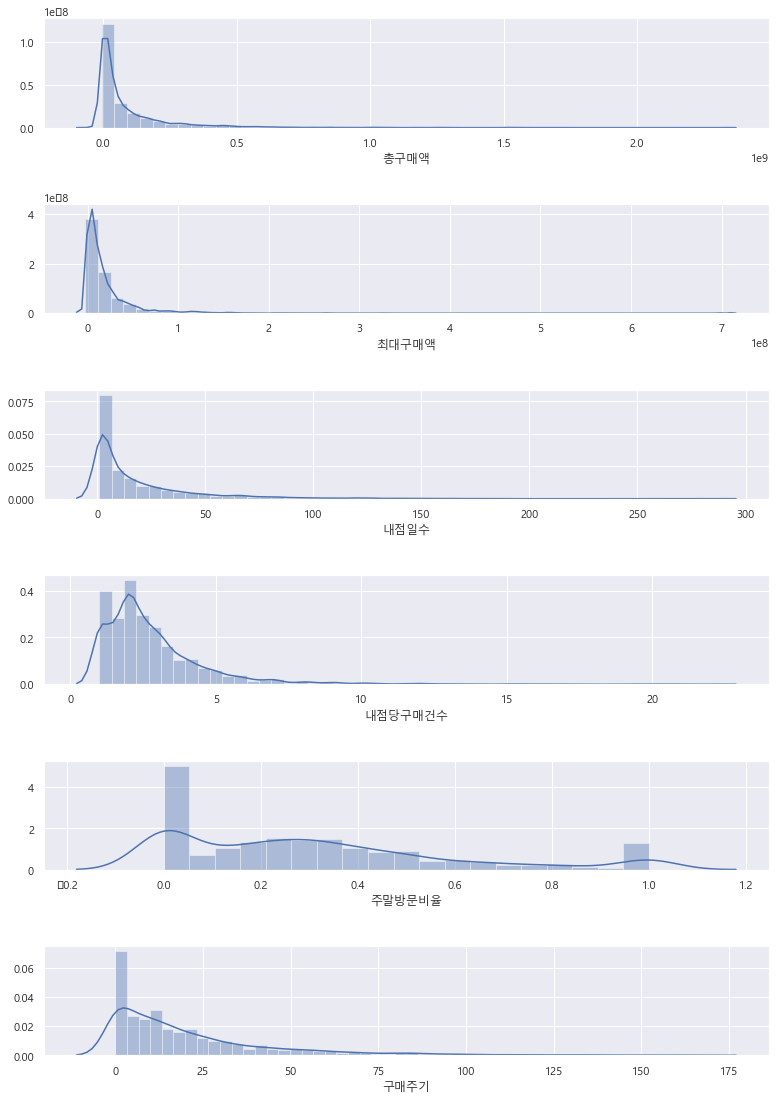

In [125]:
plt.figure(figsize=(13, 18))
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.7)
count = 1
for name in (X_train.columns):
    if name == '환불금액':
        pass
    elif (name == '주구매상품') or (name == '주구매지점'):
        pass
        #plt.subplot(6,1,(count+1))
        #sns.countplot(x=name, data=X_train)
    else:
        plt.subplot(6,1,count)
        sns.distplot(X_train[name])
        count = count + 1
        
#sns.distplot(X_train, kde=True, rug=True)

### 환불금액과 성별 사이 관계 

상관계수는 -0.078로 상관 관계가 거의 없다고 할 수 있다. 

In [33]:
import matplotlib.pyplot as plt

In [39]:
print('남자-환불금액 Nan',union_data[union_data['gender'] == 1]['환불금액'].isnull().sum())
print('여자-환불금액 Nan',union_data[union_data['gender'] == 0]['환불금액'].isnull().sum())

남자-환불금액 Nan 1026
여자-환불금액 Nan 1269
